In [ ]:
# Libraries
try:
  import matplotlib.pyplot as plt
  import seaborn as sns
  import pandas as pd
  import numpy as np
  import seaborn as sns
  import matplotlib.patches as patches

except ImportError as e:
        print(f'Import module error: {e.name}')
        print(f'pip install {e.name}')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/collab_data/Telecom_Retention (Project)/dataset.csv')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


## Stat

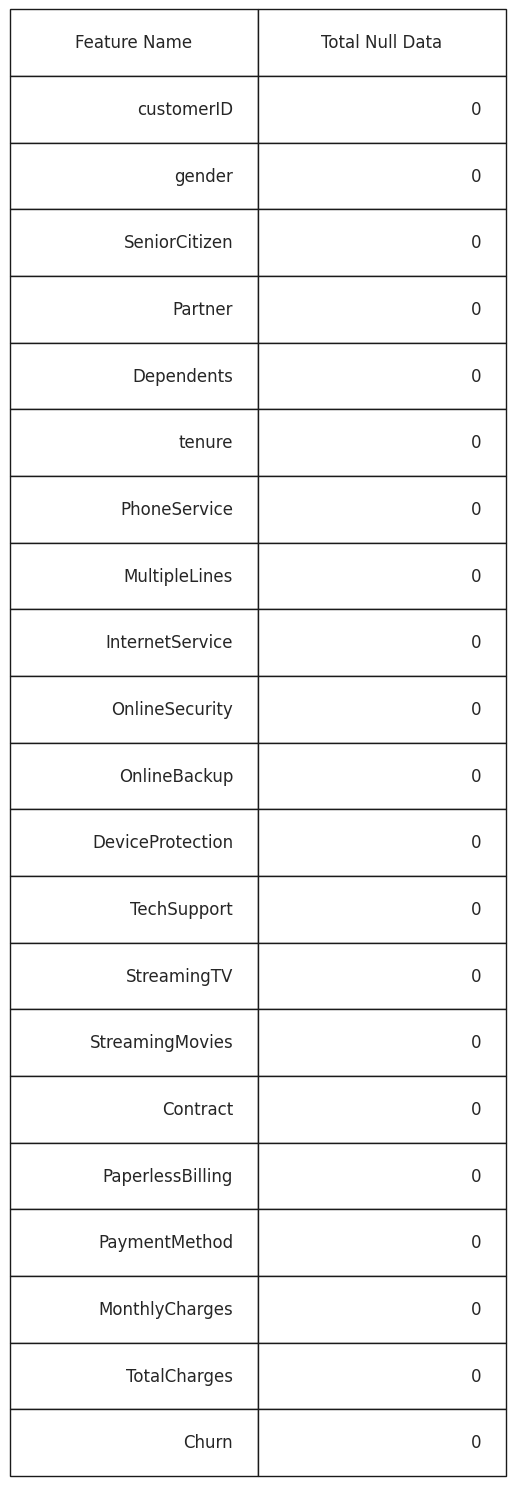

In [ ]:
##################### check for null values #####################


#define figure and axes
fig, ax = plt.subplots()
#hide the axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

# to get null data value for each column into list
null_data_list = df.isnull().sum().tolist()

total_null_data = 0
for i in null_data_list:
  # calculating total null data in a dataset
  total_null_data = total_null_data + i

# column names in a list to make table
columns_list = df.columns.values.tolist()

# combine we all data and make a matplotlib table
if total_null_data == 0 or total_null_data > 0:
  df_null_data = pd.DataFrame(list(zip(columns_list, null_data_list)))
  # adding column name to the respective columns
  df_null_data.columns = ['Feature Name', 'Total Null Data']


  # matplotlib table
  table = ax.table(cellText=df_null_data.values, colLabels=df_null_data.columns, loc='center')
  table.set_fontsize(12)
  table.scale(1,4)
  plt.show()




In [ ]:
############# Percentage of missing values #############

In [ ]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()

In [ ]:
missing

,index,0
0,customerID,0.0
1,gender,0.0
2,SeniorCitizen,0.0
3,Partner,0.0
4,Dependents,0.0
5,tenure,0.0
6,PhoneService,0.0
7,MultipleLines,0.0
8,InternetService,0.0
9,OnlineSecurity,0.0


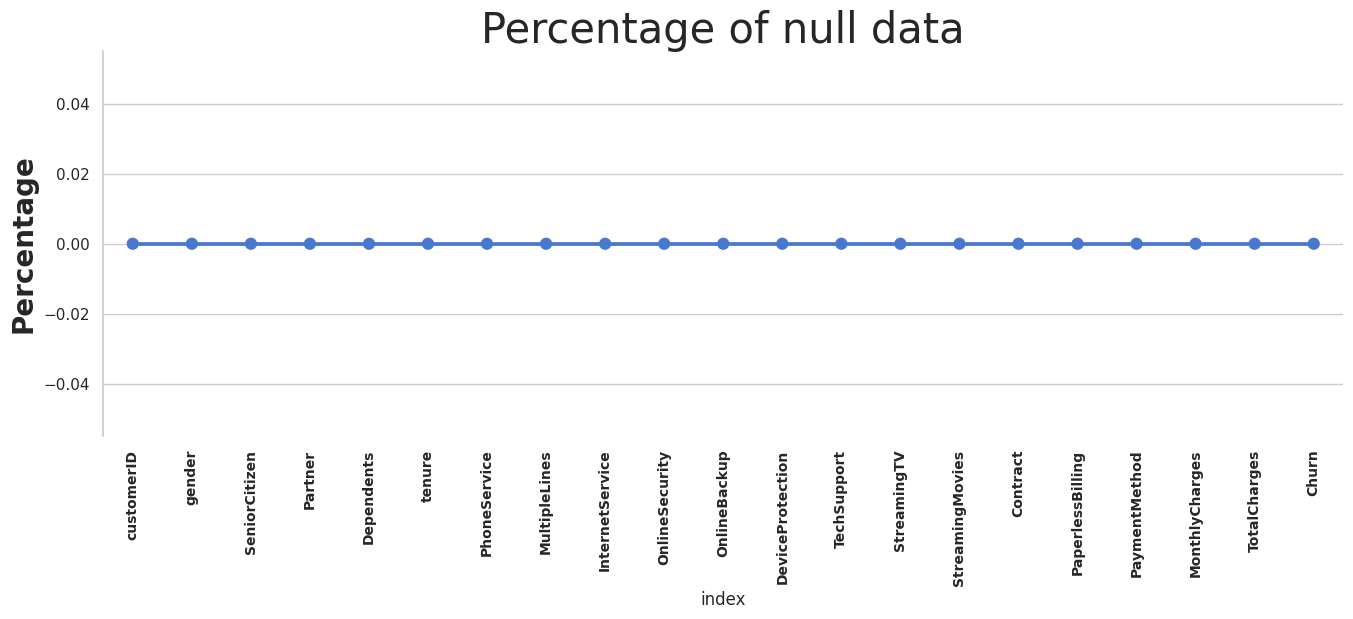

In [ ]:

plt.figure(figsize=(16,5))
sns.set_theme(style="whitegrid", palette="muted")

ax = sns.pointplot(x=missing['index'], y = missing[0])

plt.xticks(rotation =90,fontsize =10, weight="bold")
plt.title("Percentage of null data", fontsize =30)
plt.ylabel("Percentage", size=20, weight="bold")

sns.despine(bottom=True)
plt.show();

In [ ]:
################### Check for Data Types ###################

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

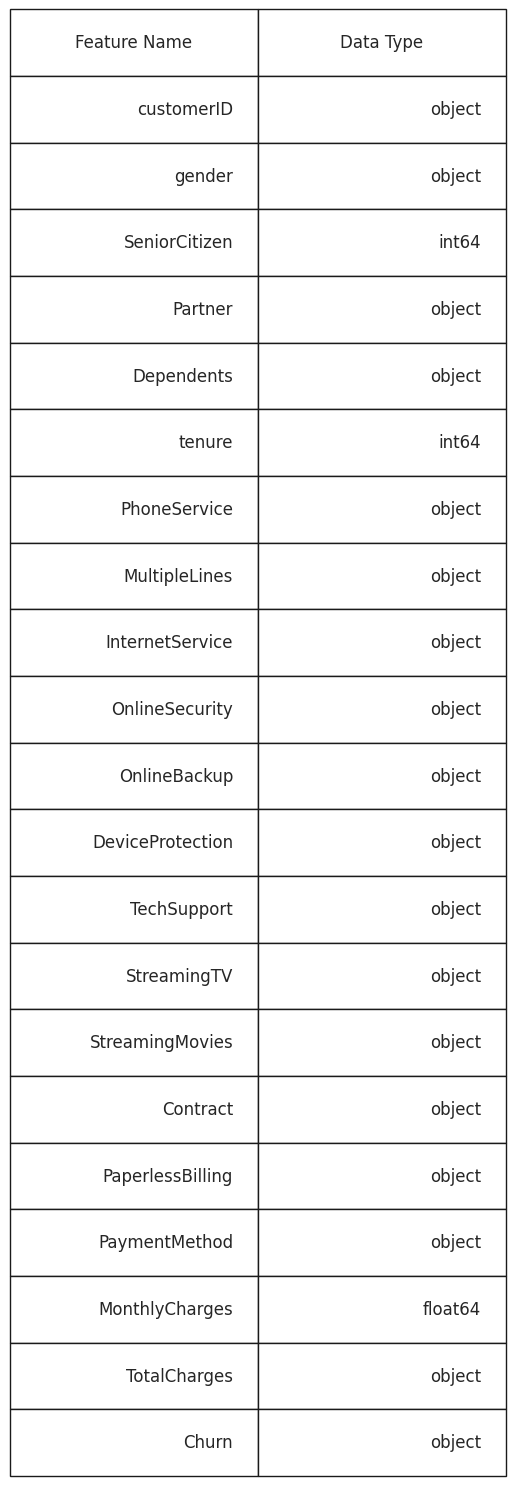

In [ ]:
#define figure and axes
fig, ax = plt.subplots()
#hide the axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')


# Checking the data types of all the column
str(df.dtypes.tolist()[0])

# column names in a list to make table
columns_list = df.columns.values.tolist()
data_types_column = df.dtypes.tolist()

list_of_data_types = []
for i in data_types_column:
  list_of_data_types.append(i)

# combine two list into dataframe
df_null_data = pd.DataFrame(list(zip(columns_list, list_of_data_types)))
# adding column name to the respective columns
df_null_data.columns = ['Feature Name', 'Data Type']



# matplotlib table
table = ax.table(cellText=df_null_data.values, colLabels=df_null_data.columns, loc='center')
table.set_fontsize(12)
table.scale(1,4)
plt.show()

In [ ]:
####################### check for banlanced / unbalanced dataset. ########################


In [ ]:
#################### percentage of churn to non churn data:  ####################
total_non_churn_customer = df['Churn'].value_counts()[0]
total_churn_customer = df['Churn'].value_counts()[1]

percentage_non_churn_customer = (total_non_churn_customer / (total_non_churn_customer+total_churn_customer)) * 100
percentage_churn_customer = (total_churn_customer / (total_non_churn_customer+total_churn_customer)) * 100

print(percentage_non_churn_customer)
print(percentage_churn_customer)


73.4630129206304
26.536987079369588


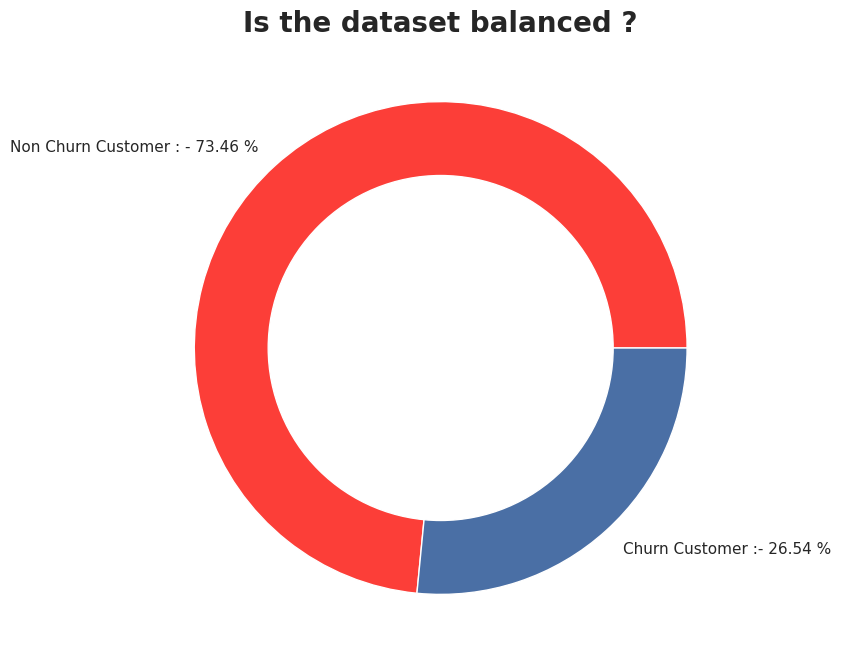

In [ ]:
fig = plt.figure(figsize = (10, 8))
# create data
values=[percentage_non_churn_customer, percentage_churn_customer]

# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')
colors = ['#fc3e38', '#4a6fa5']

# Custom wedges
plt.title("Is the dataset balanced ?",  size=20, weight="bold")
plt.pie(values, labels=[f'Non Churn Customer : - {round(percentage_non_churn_customer, 2)} %', f'Churn Customer :- {round(percentage_churn_customer, 2)} %'], colors=colors)
p = plt.gcf()
p.gca().add_artist(my_circle)


# Show the graph
plt.show()

**Data Set is highly imbalanced**

**Ratio** of positive to negative class is-- **73.46 : 26.54**

In [ ]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [ ]:
################## descriptive stat for numerical variable ##################

In [ ]:
# total charges converted onto numeric for stat analysis
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


* **Senior citizen** is actually **catagorical** though it is represented as 0 or 1, therefore statistical analysis it is not required

* **75% of the customer's tenure is 55 months**
* 50% of the customer's monthly charges 70.35 USD

* **Average customer pays 64.76 USD** monthly while **25% customers pays more 89.85 USD** monthly

* **Average customer pays 2283 USD** yearly while **25% customers pays more 3794 USD yearly**






In [ ]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

After type conversion of TotalCharges column, there are **11 fields which is NULL**

In [ ]:
# remove 11 null columns as it is very low in number
# Removing missing values
df.dropna(how = 'any', inplace = True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**No null value after type conversion**

# **Data Cleaning**



In [ ]:
# Get the max tenure
print(df['tenure'].max()) #72

72


In [ ]:
# Group the tenure in bins of 12 months

# labels
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

#
df['tenure_group'] = pd.cut(df.tenure, range(1, 80, 12), right=False, labels=labels)

In [ ]:
df['tenure_group'].head()

0     1 - 12
1    25 - 36
2     1 - 12
3    37 - 48
4     1 - 12
Name: tenure_group, dtype: category
Categories (6, object): ['1 - 12' < '13 - 24' < '25 - 36' < '37 - 48' < '49 - 60' < '61 - 72']

In [ ]:
df['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [ ]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12


In [ ]:
# drop customer ID
df = df.drop(['customerID'], axis = 1)

In [ ]:
# Drop tenure as we have grouped them
df = df.drop(['tenure'], axis = 1)

In [ ]:
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12


In [ ]:
df['tenure_group'].describe()

count       7032
unique         6
top       1 - 12
freq        2175
Name: tenure_group, dtype: object

In [ ]:
df['tenure_group'] = df['tenure_group'].astype(str)

In [ ]:
df['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [ ]:
# value count of tenure group into dataframe
tenure_count = df['tenure_group'].value_counts().rename_axis('unique_values').reset_index(name='counts')


In [ ]:
tenure_count

,unique_values,counts
0,1 - 12,2175
1,61 - 72,1407
2,13 - 24,1024
3,25 - 36,832
4,49 - 60,832
5,37 - 48,762


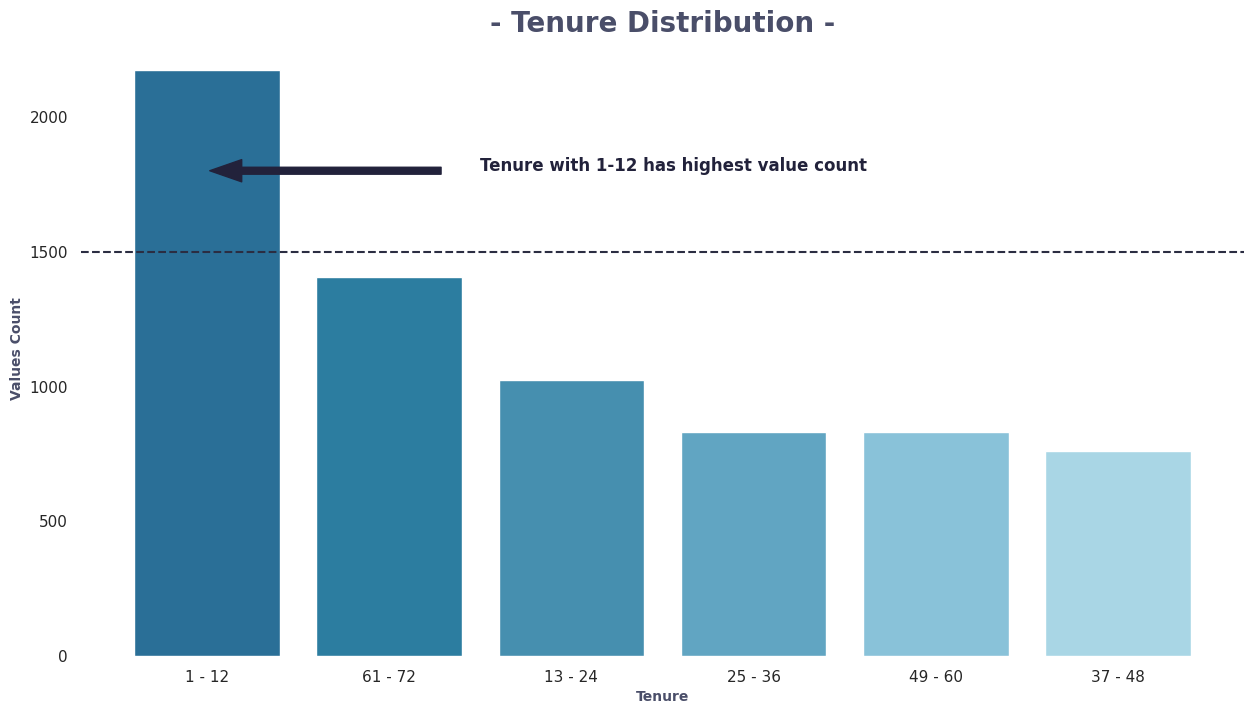

In [ ]:

# create a dataset
sns.set_theme(style="white")

tenure_count_values = tenure_count['counts'].tolist()
tenure_list = tenure_count['unique_values'].tolist()

fig = plt.figure(figsize = (15, 8))
# Create bars with different colors
plt.bar(tenure_list, tenure_count_values, color=['#2a6f97', '#2c7da0', '#468faf', '#61a5c2', '#89c2d9', '#a9d6e5'])


# Arrow
style = "Simple, tail_width=5, head_width=16, head_length=23"
kw = dict(arrowstyle=style, color="#22223b")

# (2, 1600) -> x, y
# (0, 1600) -> x length, y height
arrow = patches.FancyArrowPatch((1.3, 1800), (0, 1800) , **kw)
plt.gca().add_patch(arrow)

# add text under arrow
plt.text(x=1.5, y=1800, s="Tenure with 1-12 has highest value count",
         color='#22223b', size=12, weight="bold")


# line
plt.axhline(y=1500, color='#2b2d42', linestyle='--')

# Create names on the x-axis
plt.xlabel("Tenure", weight="bold", size=10, color="#4a4e69")
plt.ylabel("Values Count", weight="bold", size=10, color="#4a4e69")
plt.title('- Tenure Distribution -', size=20, weight="bold", color="#4a4e69")
sns.despine(left=True, bottom=True);
plt.show()




# **EDA: Univariet & bivariate analysis**





In [ ]:
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12


In [ ]:
######### gender #########


## 1) gender percentage
# value count of gender into dataframe
gender_count = df['gender'].value_counts().rename_axis('unique_values').reset_index(name='counts')
gender_count

,unique_values,counts
0,Male,3549
1,Female,3483


In [ ]:
gender_value = gender_count['unique_values'].tolist()
gender_count_value = gender_count['counts'].tolist()

In [ ]:
gender_value

['Male', 'Female']

In [ ]:
gender_count_value

[3549, 3483]

In [ ]:
# percentage
percentage_one = (( gender_count_value[0] / (gender_count_value[0] + gender_count_value[1] ))* 100)
percentage_two = (( gender_count_value[1] / (gender_count_value[0] + gender_count_value[1] ))* 100)

percentage_value = []
percentage_value.append(percentage_one)
percentage_value.append(percentage_two)

In [ ]:
'''
fig = plt.figure(figsize = (18, 8))

# first bar count plot

plt.subplot(1, 2, 1)
sns.countplot(x="gender", data=df, hue='Churn', palette=['#004e89', '#61a5c2']);
plt.xlabel("Gender", weight="bold", size=10)
plt.ylabel("Values Count", weight="bold", size=10)
plt.title('- Gender distribution with respect to Churn-', size=20, weight="bold")
sns.despine(left=True, bottom=True);


# Second pie plot

plt.subplot(1, 2, 2)
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.8, color='white')
colors = ['#374668', '#34da79']

# Custom wedges
plt.title("Gender Percentage",  size=20, weight="bold")
plt.pie(percentage_value,labels=gender_value, autopct='%1.1f%%', colors=['#004e89', '#61a5c2'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()
'''

'\nfig = plt.figure(figsize = (18, 8))\n\n# first bar count plot\n\nplt.subplot(1, 2, 1)\nsns.countplot(x="gender", data=df, hue=\'Churn\', palette=[\'#004e89\', \'#61a5c2\']);\nplt.xlabel("Gender", weight="bold", size=10)\nplt.ylabel("Values Count", weight="bold", size=10)\nplt.title(\'- Gender distribution with respect to Churn-\', size=20, weight="bold")\nsns.despine(left=True, bottom=True);\n\n\n# Second pie plot\n\nplt.subplot(1, 2, 2)\n# Create a circle at the center of the plot\nmy_circle = plt.Circle( (0,0), 0.8, color=\'white\')\ncolors = [\'#374668\', \'#34da79\']\n\n# Custom wedges\nplt.title("Gender Percentage",  size=20, weight="bold")\nplt.pie(percentage_value,labels=gender_value, autopct=\'%1.1f%%\', colors=[\'#004e89\', \'#61a5c2\'])\np = plt.gcf()\np.gca().add_artist(my_circle)\nplt.show()\n'

In [ ]:
################### PLOT ######################

def plot(column_name, df, hue, percentage_value, percentage_label):
  fig = plt.figure(figsize = (10, 5))
  colors = ['#0077b6','#fc3e38', '#0096c7', '#00b4d8']

  # first bar count plot

  plt.subplot(1, 2, 1)
  ax = sns.countplot(x=column_name, data=df, hue=hue, palette=colors);
  plt.xlabel(f'{column_name}', weight="bold", size=10)
  plt.ylabel("Values Count", weight="bold", size=10)
  plt.title( f' {column_name} distribution with respect to churn ', size=15, weight="bold")
  sns.despine(left=True, bottom=True);

  total = len(df)
  for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
  plt.tight_layout()
  #plt.show()


  # Second pie plot

  '''
  plt.subplot(1, 2, 2)
  # Create a circle at the center of the plot
  my_circle = plt.Circle( (0,0), 0.8, color='white')



  # Custom wedges
  plt.title(f"- Overall Churn Percentage -",  size=20, weight="bold")
  plt.pie(percentage_value,labels=percentage_label, autopct='%1.1f%%', colors=colors)
  p = plt.gcf()
  p.gca().add_artist(my_circle)
  plt.legend(percentage_label, loc="center")
  '''
  plt.show()

In [ ]:
############## Percentage of Ttotal churn #################


def calculate_churn_percentage(df, column_name):
  # churn customer
  churn_yes = df[(df['Churn'] == 'Yes')]
  churn_yes = churn_yes[column_name].value_counts()
  churn_yes = churn_yes[0] + churn_yes[1]

  # non churn customer
  churn_no = df[(df['Churn'] == 'No')]
  churn_no = churn_no[column_name].value_counts()
  churn_no = churn_no[0] + churn_no[1]

  # calculate percentage
  percentage_values = []
  percentage_values.append((( churn_yes / (churn_yes + churn_no))* 100))
  percentage_values.append((( churn_no / (churn_yes + churn_no))* 100))


  return percentage_values , ['Churn Yes', 'Churn No']

In [ ]:
# calculate churn percentage with respect to index column
pecentage_vals, percentage_labels = calculate_churn_percentage(df,'gender')

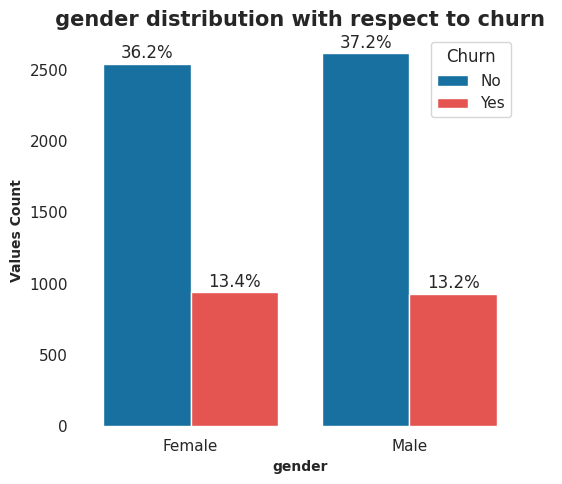

In [ ]:
plot(column_name='gender', df=df, hue = 'Churn', percentage_value = pecentage_vals, percentage_label = percentage_labels)



In [ ]:
#Filter syntax : Not requied ( Just for knowledge )

In [ ]:
# churn male customer
gender_male_churn_yes = df[(df['gender'] == 'Male') & (df['Churn'] == 'Yes')]
gender_male_churn_yes['gender'].value_counts()

Male    930
Name: gender, dtype: int64

In [ ]:
# non churn male customer
gender_male_churn_no = df[(df['gender'] == 'Male') & (df['Churn'] == 'No')]
gender_male_churn_no['gender'].value_counts()

Male    2619
Name: gender, dtype: int64

In [ ]:
# Senior Citizen

In [ ]:
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12


In [ ]:
pecentage_vals, percentage_labels = calculate_churn_percentage(df, 'SeniorCitizen')

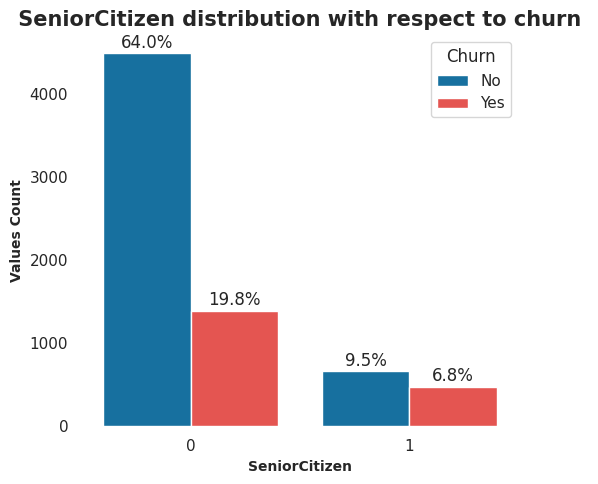

In [ ]:
plot(column_name='SeniorCitizen', df=df, hue = 'Churn', percentage_value = pecentage_vals, percentage_label = percentage_labels)



In [ ]:
# Partner

In [ ]:
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12


In [ ]:
percentage_vals, percentage_labels = calculate_churn_percentage(df, column_name='Partner')

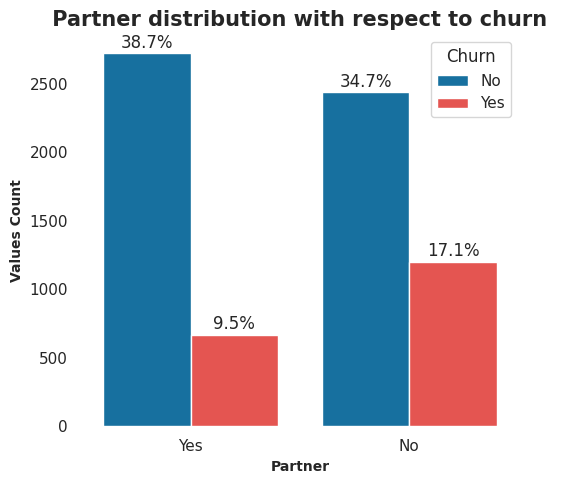

In [ ]:
plot(column_name='Partner', df=df, hue = 'Churn', percentage_value=percentage_vals, percentage_label = percentage_labels)





In [ ]:
# dependents

In [ ]:
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12


In [ ]:
percentage_vals, percentage_labels = calculate_churn_percentage(df, column_name='Dependents')

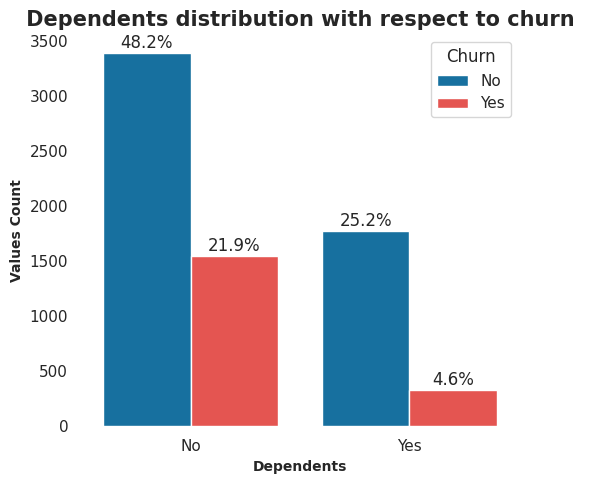

In [ ]:
plot(column_name='Dependents', df=df, hue = 'Churn', percentage_value=percentage_vals, percentage_label = percentage_labels)


In [ ]:
# PhoneService

In [ ]:
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12


In [ ]:
percentage_vals, percentage_labels = calculate_churn_percentage(df, column_name='PhoneService')

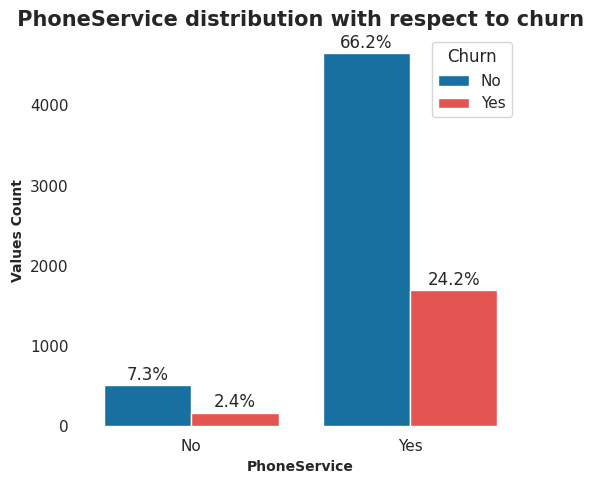

In [ ]:
plot(column_name='PhoneService', df=df, hue = 'Churn', percentage_value=percentage_vals, percentage_label = percentage_labels)


In [ ]:
# MultipleLines

In [ ]:
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12


In [ ]:
percentage_vals, percentage_labels = calculate_churn_percentage(df, column_name='MultipleLines')

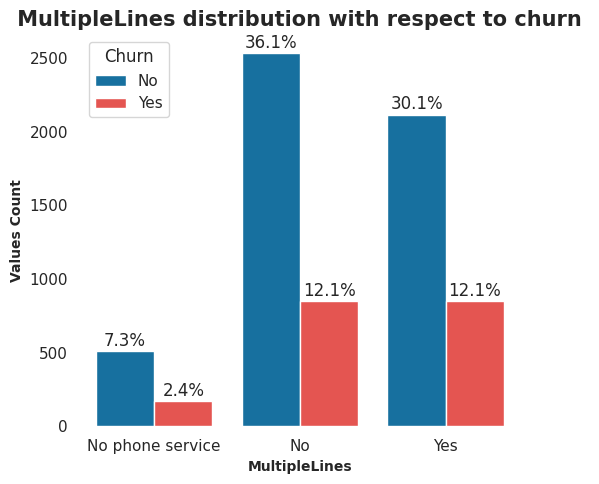

In [ ]:
plot(column_name='MultipleLines', df=df, hue = 'Churn', percentage_value=percentage_vals, percentage_label = percentage_labels)


In [ ]:
# Contract

In [ ]:
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12


In [ ]:
percentage_vals, percentage_labels = calculate_churn_percentage(df, column_name='Contract')

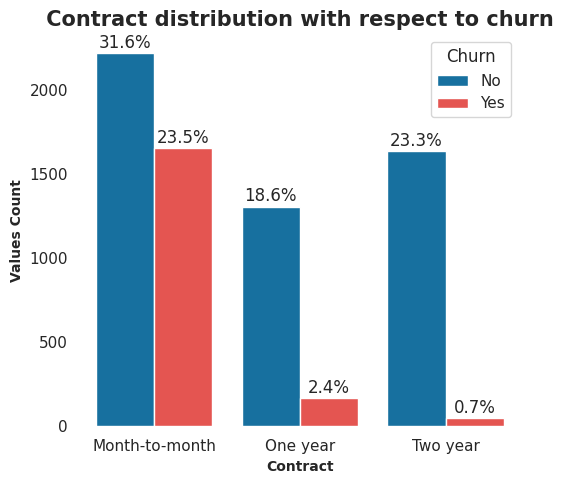

In [ ]:
plot(column_name='Contract', df=df, hue = 'Churn', percentage_value=percentage_vals, percentage_label = percentage_labels)


In [ ]:
# InternetService

In [ ]:
percentage_vals, percentage_labels = calculate_churn_percentage(df, column_name='InternetService')

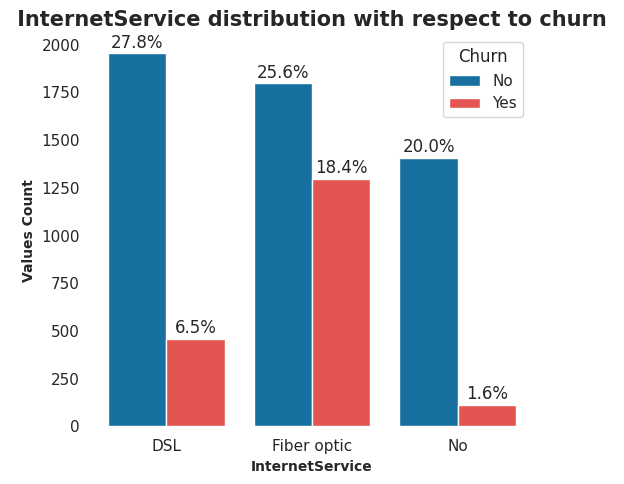

In [ ]:
plot(column_name='InternetService', df=df, hue = 'Churn', percentage_value=percentage_vals, percentage_label = percentage_labels)


In [ ]:
# OnlineSecurity

In [ ]:
percentage_vals, percentage_labels = calculate_churn_percentage(df, column_name='OnlineSecurity')

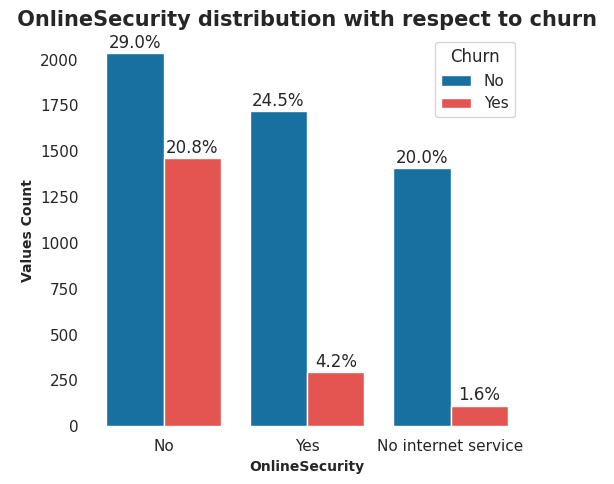

In [ ]:
plot(column_name='OnlineSecurity', df=df, hue = 'Churn', percentage_value=percentage_vals, percentage_label = percentage_labels)


In [ ]:
# OnlineBackup

In [ ]:
percentage_vals, percentage_labels = calculate_churn_percentage(df, column_name='OnlineBackup')

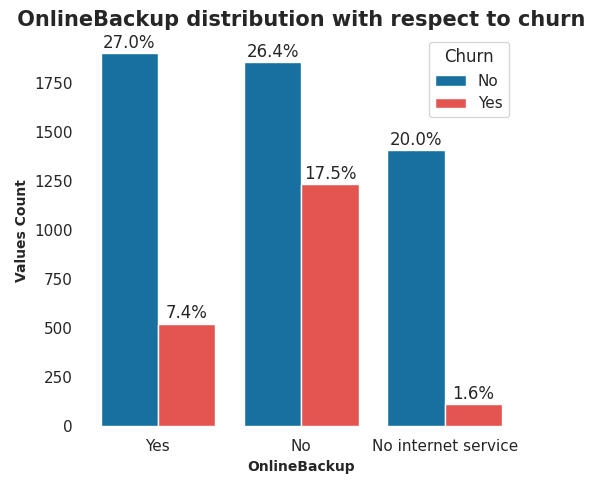

In [ ]:
plot(column_name='OnlineBackup', df=df, hue = 'Churn', percentage_value=percentage_vals, percentage_label = percentage_labels)


In [ ]:
# DeviceProtection

In [ ]:
percentage_vals, percentage_labels = calculate_churn_percentage(df, column_name='DeviceProtection')

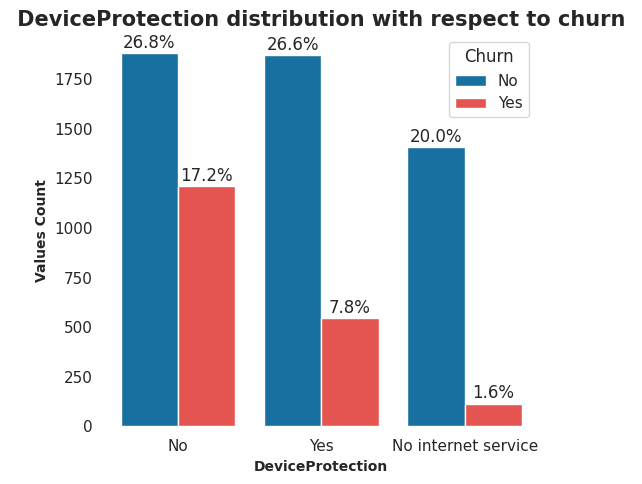

In [ ]:
plot(column_name='DeviceProtection', df=df, hue = 'Churn', percentage_value=percentage_vals, percentage_label = percentage_labels)


In [ ]:
# StreamingTV

In [ ]:
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12


In [ ]:
percentage_vals, percentage_labels = calculate_churn_percentage(df, column_name='StreamingTV')

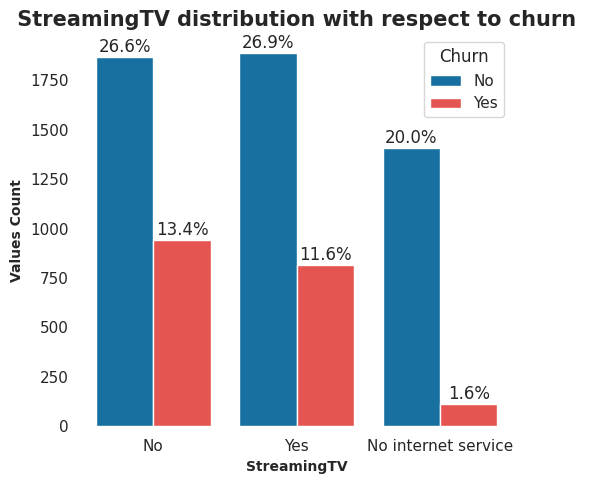

In [ ]:
plot(column_name='StreamingTV', df=df, hue = 'Churn', percentage_value=percentage_vals, percentage_label = percentage_labels)


In [ ]:
# StreamingMovies

In [ ]:
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12


In [ ]:
percentage_vals, percentage_labels = calculate_churn_percentage(df, column_name='StreamingMovies')

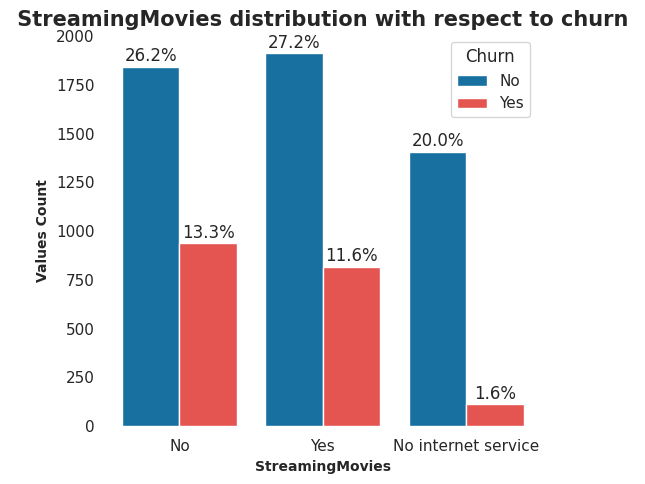

In [ ]:
plot(column_name='StreamingMovies', df=df, hue = 'Churn', percentage_value=percentage_vals, percentage_label = percentage_labels)


In [ ]:
# PaperlessBilling

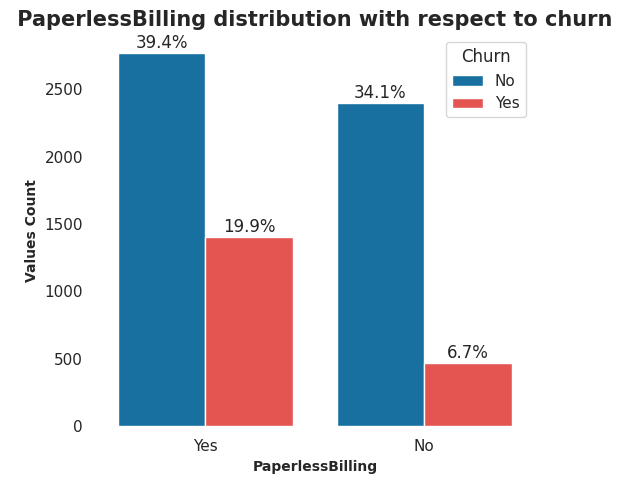

In [ ]:
percentage_vals, percentage_labels = calculate_churn_percentage(df, column_name='PaperlessBilling')
plot(column_name='PaperlessBilling', df=df, hue = 'Churn', percentage_value=percentage_vals, percentage_label = percentage_labels)


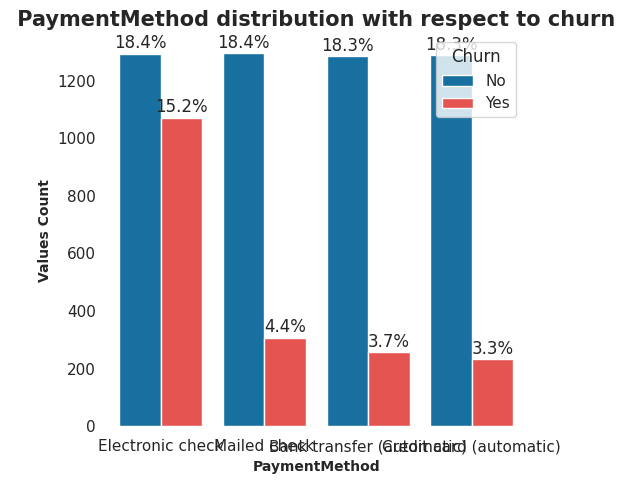

In [ ]:
# PaymentMethod
percentage_vals, percentage_labels = calculate_churn_percentage(df, column_name='PaymentMethod')
plot(column_name='PaymentMethod', df=df, hue = 'Churn', percentage_value=percentage_vals, percentage_label = percentage_labels)


In [ ]:
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12


<ipython-input-154-354b30b7b258>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="Blues")


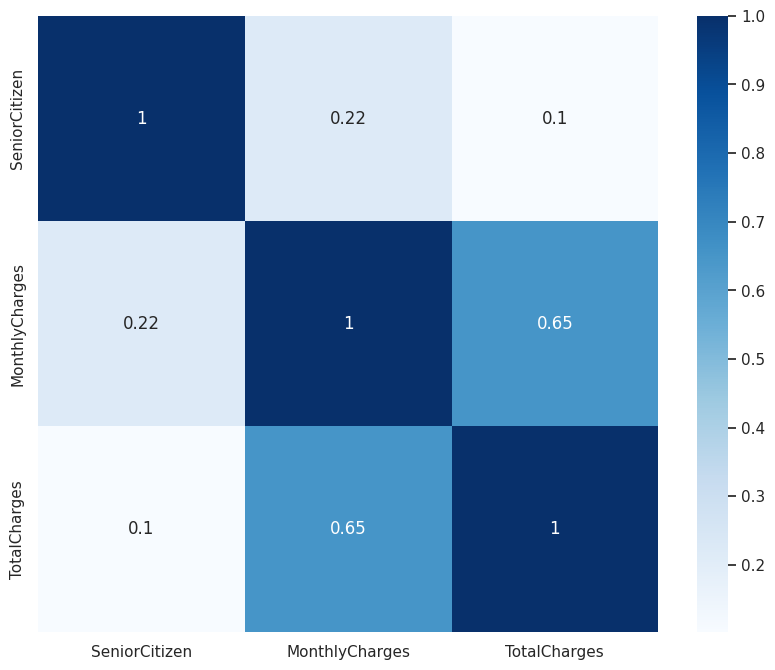

In [ ]:
#ploting the heatmap for correlation

fig = plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.show()

In [ ]:
df.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'tenure_group'],
      dtype=object)

In [ ]:
# convert churn yes no to 1, 0

df['Churn'] = np.where(df.Churn == 'Yes',1,0)

In [ ]:
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12


In [ ]:
#### One hot encoding : converting categorical variables to numerical variables

df_dummies = pd.get_dummies(df)
df_dummies.head(1)

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0


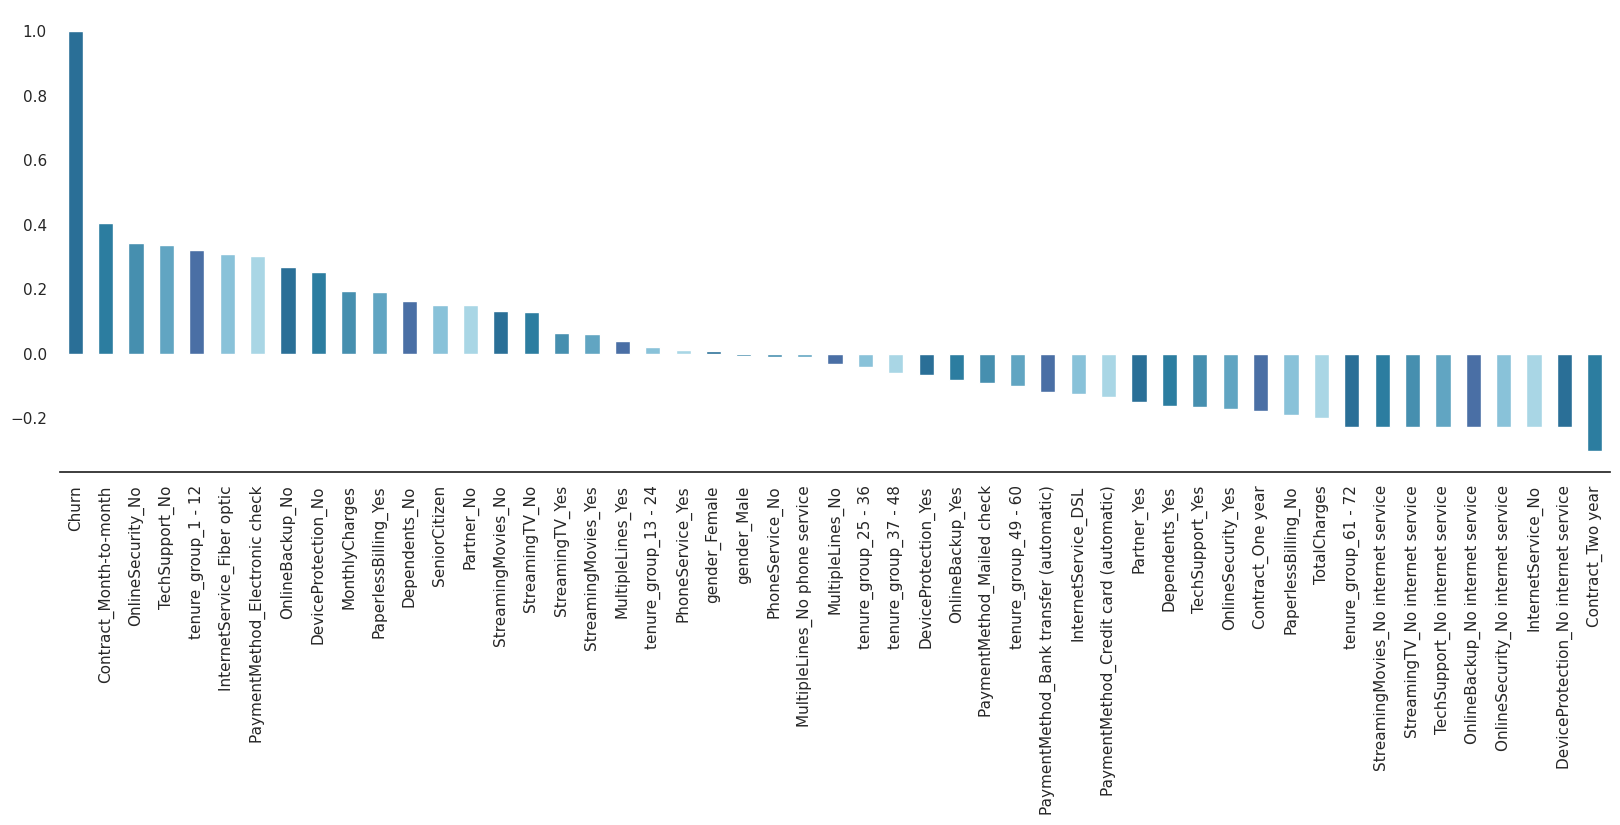

In [ ]:
fig = plt.figure(figsize = (20, 6))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar', color=['#2a6f97', '#2c7da0', '#468faf', '#61a5c2', '#4a6fa5', '#89c2d9', '#a9d6e5'])
sns.despine(left=True, bottom=False);
plt.show()


 Observation from the above chart:


1.   **Month to month contact**, **payment method electronic check**, no tech support, no online security, tenure group 1-12,  has **highest churn rate**.
2.   **Two years contract**, one year contarct, no internet service, no paperless billing has lowest churn rate
3. **Gender**, **phone service**, tenure group 61-71 has no effect of Churn rate



---



---




In [ ]:
corr = df_dummies.corr()

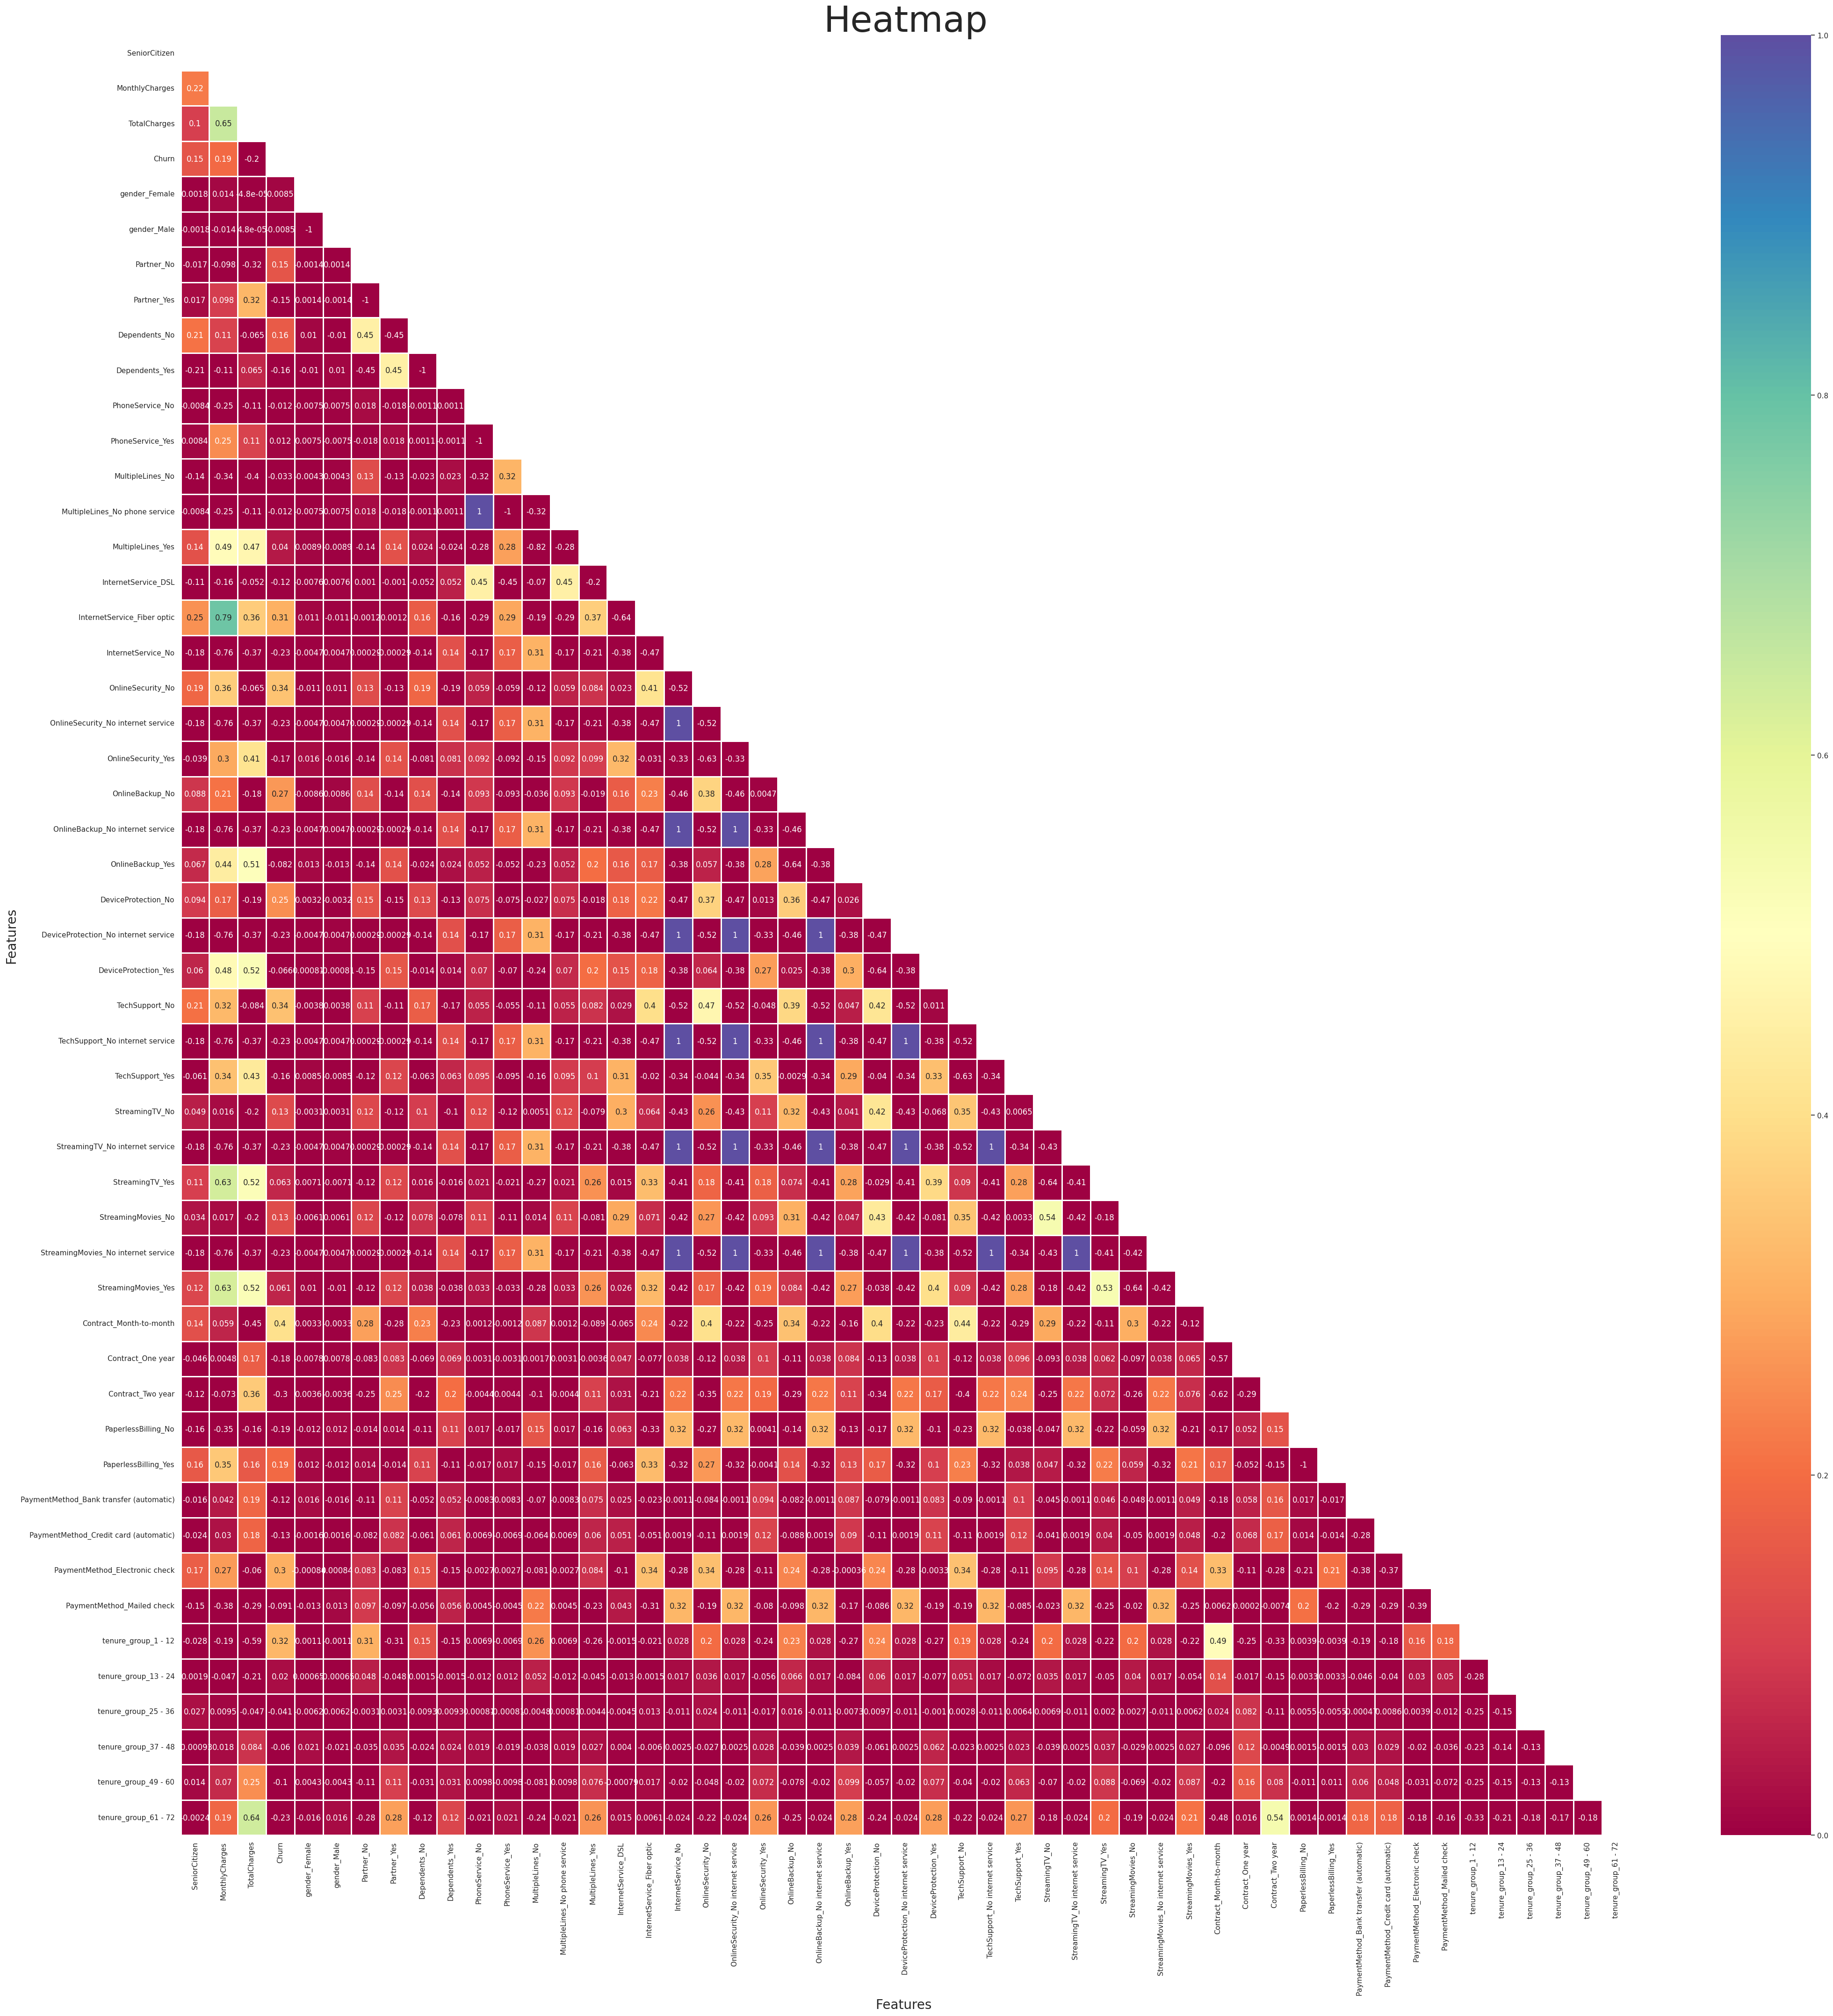

In [ ]:
#ploting the heatmap for correlation

plt.figure(figsize = (50, 50))

corr = df_dummies.corr()
matrix = np.triu(corr)
sns.heatmap(corr, mask=matrix,annot=True, vmin = 0, vmax = 1, linewidths=2, cmap="Spectral")


plt.title("Heatmap", fontsize = 55)
plt.xlabel("Features ", fontsize = 20)
plt.ylabel("Features", fontsize = 20)

plt.show()

**Observation : highest co relation between two features** :


1.   Internetservice_fiber_optic : monthlyChanges = 0.79
2.   totalcharges : monthlyCharges = 0.65
3.   Tenure_group_61-72 : totalCharges = 0.64
4.   StreamingTv_yes : monthlyChanges = 0.63
5.   StreamingMovies_yes : monthlyChanges = 0.63



In [ ]:
df_dummies.head(1)

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0


In [ ]:
Mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] == 0) ],
                color="'#0077b6'", fill = True)
Mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", fill= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

#### Churn rate increases with increase in monthly charges

Text(0.5, 1.0, 'Total charges by churn')

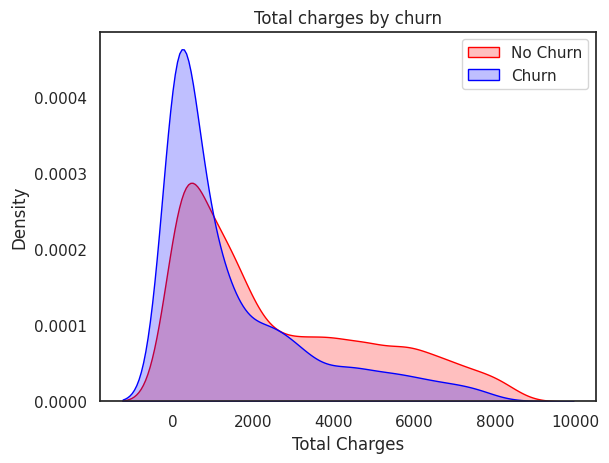

In [ ]:
Tot = sns.kdeplot(df_dummies.TotalCharges[(df_dummies["Churn"] == 0) ],
                color="Red", fill = True)
Tot = sns.kdeplot(df_dummies.TotalCharges[(df_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", fill= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

#### Churn rate decreases with increase in total charges

# **Model buidling**

In [ ]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [ ]:
df_dummies.head(1)

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0


In [ ]:
####### cvreating X & Y data #######
y = df_dummies['Churn']
x = df_dummies.drop('Churn', axis=1)


In [ ]:
####### Lets check the shape of x and y #######
print(y.shape)
print(x.shape)

(7032,)
(7032, 50)


In [ ]:
###### train test split #######
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=100)

### DecisionTreeClassifier

In [ ]:
############ hyper parameter tuning ##########

In [ ]:
algo = DecisionTreeClassifier()


param_dict ={
    "criterion": ["entropy", "gini", "log_loss"],
    "max_depth": [4,6,8,10],
    "min_samples_leaf" : [6,8,9,12],
    "random_state" : [12,15, 50, 100],
    "splitter" : ["best","random"]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(algo, param_grid = param_dict, cv=8, n_jobs=-1)

In [ ]:
grid.fit(x_train, y_train)

GridSearchCV(cv=8, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [6, 8, 9, 12],
                         'random_state': [12, 15, 50, 100],
                         'splitter': ['best', 'random']})

In [ ]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=12, random_state=50,
                       splitter='random')

In [ ]:
algo_1 = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=9,
                       random_state=12)
algo_1.fit(x_train,y_train)
y_pred=algo_1.predict(x_test)
y_pred
algo_1.score(x_test,y_test)

0.7661691542288557

In [ ]:

best_dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=9, random_state=12)
best_dt.fit(x_train,y_train)
y_pred=best_dt.predict(x_test)
y_pred
best_dt.score(x_test,y_test)

0.7661691542288557

In [ ]:
# decision tree value
dt_score = best_dt.score(x_test,y_test)

# random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
algo = RandomForestClassifier()


param_dict ={
    "criterion": ["entropy", "gini", "log_loss"],
    "max_depth": [4,6,8,10],
    "min_samples_leaf" : [6,8,9,12],
    "random_state" : [15, 50, 100],
    "n_estimators" : [100, 50]
}

In [ ]:
#from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(algo, param_grid = param_dict, cv=8, n_jobs=-1)

In [ ]:
grid.fit(x_train, y_train)

GridSearchCV(cv=8, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [6, 8, 9, 12],
                         'n_estimators': [100, 50],
                         'random_state': [15, 50, 100]})

In [ ]:
grid.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=9, random_state=15)

In [ ]:
best_rf = RandomForestClassifier(max_depth=10, min_samples_leaf=9, random_state=15)

In [ ]:
best_rf.fit(x_train,y_train)
y_pred=best_rf.predict(x_test)
y_pred
best_rf.score(x_test,y_test)

0.7953091684434968

In [ ]:
print(classification_report(y_test, y_pred, labels=[0,1]))


              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1013
           1       0.67      0.53      0.59       394

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407



In [ ]:
# decision tree value
rf_score = best_rf.score(x_test,y_test)

## XGboost

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
algo = xgb.XGBClassifier()


param_dict ={
    "loss": ["og_loss", "exponential"],
    "max_depth": [4,6,8,10],
    "random_state" : [15, 50, 100],
    "n_estimators" : [100, 50]
}

In [ ]:
grid = GridSearchCV(algo, param_grid = param_dict, cv=8, n_jobs=-1)

In [ ]:
grid.fit(x_train, y_train)

[13:45:18] WARNING: ../src/learner.cc:767: 
Parameters: { "loss" } are not used.



GridSearchCV(cv=8,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'loss': ['og_loss', 'exponential'],
                         'max_depth': [4, 6, 8, 10], 'n_estimators': [100, 50],
                         'random_state': [15, 50, 100]})

In [ ]:
grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, loss='og_loss',
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [ ]:
best_xgboost = xgb.XGBClassifier(objective="binary:logistic", random_state=42, n_estimators=50, loss='og_loss', max_depth=4)


In [ ]:
best_xgboost.fit(x_train,y_train)
y_pred=best_xgboost.predict(x_test)
y_pred
best_xgboost.score(x_test,y_test)

[13:52:49] WARNING: ../src/learner.cc:767: 
Parameters: { "loss" } are not used.



0.7825159914712153

In [ ]:
# decision tree value
xg_boost_score = best_xgboost.score(x_test,y_test)

### Final Algorithm score table

In [ ]:
lst = ['decision tree', 'random forest', 'xgboost']
lst2 = [dt_score ,rf_score , xg_boost_score]


score_df = pd.DataFrame(list(zip(lst, lst2)),
               columns =['Algorithm', 'accuracy'])
score_df

,Algorithm,accuracy
0,decision tree,0.766169
1,random forest,0.795309
2,xgboost,0.782516
